perps price ~ liquidations
spot price ~ liquidations
perps price ~ liquidations , reserves
spot price ~liquidations, reserves
repeat same with liquidations -> only binance liquidations, binance price
binance liquidations, binance price, + reserves
reserves -> exponential smoothing,  trend =d reserves.ewm / dt
liquidations ERC20 better?
vectorbt implementation to find optimal trialing stop
constant time position, small stop loss

In [1]:
%run base.ipynb
from ct.fs import *
%matplotlib inline
from ct.alfafactory import *

/opt/anaconda/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:67: NumbaWarning: Cannot cache compiled function "_partial_sum_2d" as it uses outer variables in a closure
  def _partial_sum_2d(x, y, c, ix, iy, sx_c, sy_c, c_sum, l_max,
/opt/anaconda/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:94: NumbaWarning: Cannot cache compiled function "_distance_covariance_sqr_avl_impl" as it uses outer variables in a closure
  def _distance_covariance_sqr_avl_impl(
/opt/anaconda/lib/python3.8/site-packages/dcor/_fast_dcov_mergesort.py:99: NumbaWarning: Cannot cache compiled function "_compute_aijbij_term" as it uses outer variables in a closure
  def _compute_aijbij_term(x, y):
/opt/anaconda/lib/python3.8/site-packages/dcor/_fast_dcov_mergesort.py:163: NumbaWarning: Cannot cache compiled function "_distance_covariance_sqr_mergesort_generic_impl" as it uses outer variables in a closure
  def _distance_covariance_sqr_mergesort_generic_impl(x, y, unbiased):


logging to /core/logs/ct.log


The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


# market data

In [96]:
qbars('ETHUSDT_210326@binance',freq="1H",table='ppttrades',date=date(2021,2,9),addwhere=', vol>0.01').resample('1H').last().ffill()

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.09 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.09 ,  symbol=`ETHUSDT_210326 , vol>0.01


,o,h,l,c,v
exch_ts,,,,,
2021-02-09 00:00:00,1862.5,1873.92,1845.6,1863.55,82.06
2021-02-09 01:00:00,1863.86,1865.9,1830.61,1839.8,40.888
2021-02-09 02:00:00,1836.7,1845.44,1827.55,1842.47,30.534
2021-02-09 03:00:00,1842.47,1852.17,1832.05,1845.14,81.937
2021-02-09 04:00:00,1845.13,1862.63,1843.42,1853.6,31.491
2021-02-09 05:00:00,1853.6,1856.47,1844.86,1856.47,21.003
2021-02-09 06:00:00,1854.56,1863,1850.99,1860.05,46.872
2021-02-09 07:00:00,1863,1875.81,1855.23,1866.81,51.965
2021-02-09 08:00:00,1866.86,1942.87,1866.86,1932.43,420.798


In [13]:
df0=qbars('ETHUSD_210326@binance',freq="1H",table='futtrades',date=[date(2021,2,9),date(2021,5,21)],addwhere=', vol>0.01').resample('1H').last().ffill()

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date within 2021.02.09 2021.05.21,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date within 2021.02.09 2021.05.21,  symbol=`ETHUSD_210326 , vol>0.01


# alternative data

In [14]:
df1=qbars('ETHUSDT_210326@binance',freq="1H",table='ppttrades',date=[date(2021,2,9),date(2021,5,21)],addwhere=', vol>0.01').resample('1H').last().ffill()

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date within 2021.02.09 2021.05.21,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date within 2021.02.09 2021.05.21,  symbol=`ETHUSDT_210326 , vol>0.01


In [15]:
df0=df0.loc['2021-02-09':]
df1=df1.loc['2021-02-09':]

# indicator viz

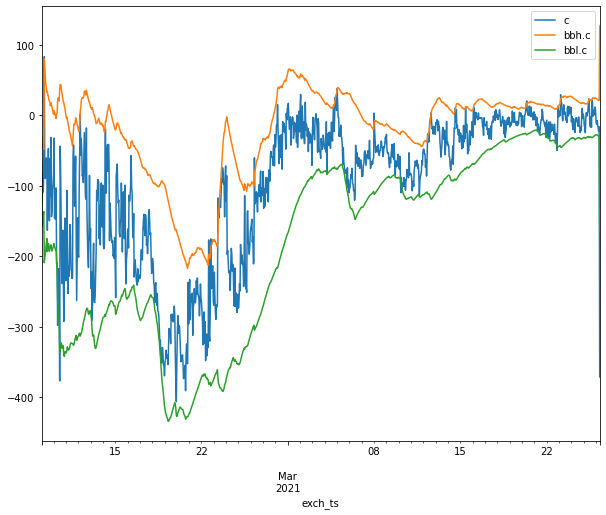

In [19]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
#df0[['c']].subtract(df1[['c']]).iplot()
DF((df0.c-df1.c)/df1.c*10000).addbb(lags=50,methodma='ewm',methodstd='ewm',nstdh=2,nstdl=2).plot()
#DF(df0['c']-df1['c']).gr()

In [41]:
datetime.time(23,59,59)

datetime.time(23, 59, 59)

In [62]:
len(pd.date_range(start='2020-01-01', end='2020-01-02',freq='1H'))

25

In [43]:
df0.index[-1].time()<datetime.time(23,59,59)

False

In [126]:
#sym,freq=None,ts='exchtm',table=None,date=None,



# backtrader strategy backtest

In [127]:
def initcerebro(icap=10000, fees=0.0006,multi=False,futures=False,margin=0.01,mult=1.0):
    cerebro = bt.Cerebro(stdstats=False)
    
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    cerebro.addobserver(bt.observers.Trades)
    if multi:
        cerebro.addobservermulti(bt.observers.BuySell)    
    else:
        cerebro.addobserver(bt.observers.BuySell)
    percslippage=0# 10bps
    cerebro.broker.setcash(icap)
    if futures:
        cerebro.broker.setcommission(commission=fees,margin=margin,mult=mult)
    else:
        cerebro.broker.setcommission(commission=fees)
    
    cerebro.broker.set_slippage_perc(percslippage, slip_open=True, slip_limit=True, slip_match=True, slip_out=False)
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='ta')
    cerebro.addanalyzer(trade_list,_name='tradelist')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0.0, annualize=True, timeframe=bt.TimeFrame.Days)
    cerebro.addanalyzer(bt.analyzers.Transactions, _name='txn')
    cerebro.addanalyzer(bt.analyzers.TimeReturn,_name='timereturn')
    #cerebro.addanalyzer(bt.analyzers.Returns,_name='returns')
    cerebro.addanalyzer(bt.analyzers.LogReturnsRolling,_name='logreturnsrolling')


    return cerebro


In [128]:
bt_trailpercent=0.005 #0.5%
liqlimit=1000

# class Spread2(bt.indicators.Indicator):
#     #lines = ('spread',)
#     #params = {'period':20}#, movav=btind.MovAv.Simple)
#     def next(self):
#         print(f"self.spread0={self.spread[0]}")
#         #self.lines.spread[0]=self.data0[0].close-self.data1[0].close
#     def __init__(self):
#         self.spread=self.data0[0].close-self.data1[0].close
#         self.spread=movav = self.p.movav(self.data, period=self.p.period)
#         self.l.spread = bt.Cmp(movav, self.data)    


#     spread_bps = (df0.c-df1.c)/df1.c
#     bb=DF({'spread':spread_bps}).addbb(lags=50,methodma='ewm',methodstd='ewm',nstdh=nstdh,nstdl=nstdl,dropna=False)
#     entries = bb['spread'] < bb['bbl.spread']
#     exits = bb['spread'] > bb['bbh.spread']

ole=1

class Spread(bt.indicators.Indicator):
    params = (('lags', 5), ('nstdh', 1.0), ('nstdl',1.0 ),('methodma','ma'),('methodstd','ma'),)
    _mindatas = 20
    lines = ('spread','spreadBBH','spreadBBL','buy','sell',)
    def next(self):
        print("!!nextspread")
        
        df0c=DF(npa(self.data0.get(size=self.p.lags)))
        df1c=DF(npa(self.data1.get(size=self.p.lags)))
        #print(f"df0c={df0c}, {npa(df0c)}")
        if not len(df0c):return
        spread_bps=((df0c-df1c)/df1c).rename(columns={0:'spread'})
        #display(spread_bps)
        self.lines.spread[0]=spread_bps.iloc[-1]
        #print(f"spread_bps.values = {spread_bps.values}")
        #print(f" len spread_bps.values = {len(spread_bps.values).flatten()}")
        #print(f"DF spread_bps = {DF({'spread':spread_bps.values.flatten()})}")
        #print(f"self.p.nstdh={self.p.nstdh}")
        bb=spread_bps.addbb(lags=self.p.lags,methodma=self.p.methodma,methodstd=self.p.methodstd,nstdh=self.p.nstdh,nstdl=self.p.nstdl,dropna=False)
#         spread_bps1 = (df0.c-df1.c)/df1.c
#         bb1=DF({'spread':spread_bps1}).addbb(lags=self.p.lags,methodma=self.p.methodstd,methodstd=self.p.methodstd,nstdh=self.p.nstdh,nstdl=self.p.nstdl,dropna=False)
#         display(bb)
#         display(bb1)
        
#         global ole
#         ole+=1
#         if ole>5:
#             raise 1
        #print(bb)
        
        
        
#             spread_bps = (df0.c-df1.c)/df1.c
#             bb=DF({'spread':spread_bps}).addbb(lags=20,methodma='ewm',methodstd='ewm',nstdh=nstdh,nstdl=nstdl,dropna=False)
#             entries = bb['spread'] < bb['bbl.spread']
#             exits = bb['spread'] > bb['bbh.spread']

        self.lines.spreadBBH[0]=bb['bbh.spread'].iloc[-1]#(self.data0[0]-self.data1[0])/self.data1[0]
        self.lines.spreadBBL[0]=bb['bbl.spread'].iloc[-1]
        self.lines.buy[0]=float(self.lines.spread[0]<self.lines.spreadBBL[0])/100
        #print(f"self.lines.buy[0] {self.lines.buy[0]}")
        #ipdb.set_trace()
        self.lines.sell[0]=float(self.lines.spread[0]>self.lines.spreadBBH[0])/100
        #print(f"self.lines.sell[0] {self.lines.sell[0]}")

class Strategy(bt.Strategy):
    params = (('trailpercent', bt_trailpercent),('lags',20),('nstdh',1.4),('nstdl',1.8),('methodma','ma'),('methodstd','ma'),)

    def notify_order(self, order):
        if not order.alive():
            self.order = None  # No pending orders

    def __init__(self):
        self.spread=Spread(self.data0,self.data1,lags=self.p.lags,nstdh=self.p.nstdh,nstdl=self.p.nstdl,methodma=self.p.methodma,methodstd=self.p.methodma)
        #self.spread=self.data0.close(0)-self.data1.close(1)
        pass#self.spread=self.datas[0].close-self.datas[1].close
        
    
    def start(self):
        self.order = None  # Avoid operrations on pending order

    def next(self):
        
        print(f"self.data0.close[0]={self.data0.close[0]}")
        
        if self.order:
            return  # pending order execution

        
        if not self.position:  # not in the market
            if (self.spread.buy[0] and not np.isnan(self.spread.buy[0])):
                #print(f"buy 0 -1 {self.spread.buy[0], bool(self.spread.buy[0])}")
                self.order = self.buy(data=self.data0,exectype=bt.Order.Market)#,size=1)
                self.order = self.sell(data=self.data1,exectype=bt.Order.Market)#,size=1)                
                self.order = 'none'
        elif self.order is None: 
            if (self.spread.sell[0] and not np.isnan(self.spread.sell[0])) :
                self.order = self.sell(data=self.data0,exectype=bt.Order.Market)#,size=1)
                self.order = self.buy(data=self.data1,exectype=bt.Order.Market)#,size=1)            
        
#         if not self.position:  # not in the market
#             if (self.data0.close[0] - self.data1.close[0])<-800 :
#                 self.order = self.buy(data=self.data0,exectype=bt.Order.Market,size=1)
#                 self.order = self.sell(data=self.data1,exectype=bt.Order.Market,size=1)                
#                 self.order = 'none'
#         elif self.order is None: 
#             if (self.data0.close[0] - self.data1.close[0])>-100 :
#                 self.order = self.sell(data=self.data0,exectype=bt.Order.Market,size=1)
#                 self.order = self.buy(data=self.data1,exectype=bt.Order.Market,size=1)                
                
            

        
def btstrat(df0,df1,lags=20,nstdl=2,nstdh=2,methodma='ma',methodstd='ma',verbose=0,plot=False):        

    cerebro=initcerebro(multi=True,futures=True,fees=0.0006,margin=0.1,mult=10.)

#     data0=bt.feeds.PandasData(dataname=df0.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None)#,timeframe=bt.TimeFrame.Hours)
#     cerebro.adddata(data0,name='BTCUSD_210326@binance')
#     data1=bt.feeds.PandasData(dataname=df1.rename(columns={'o':'open','h':'high','l':'low','c':'close','v':'volume'}),openinterest=None)#,timeframe=bt.TimeFrame.Hours)
#     cerebro.adddata(data1,name='BTCUSDT_210326@binance')

    data0=KDBFeed(sym='ETHUSD_210326@binance',freq='1H',ts='exchtm',table=None, date=[date(2021,2,10),date(2021,3,25)],addwhere=', vol>0.01')
    cerebro.adddata(data0,name='BTCUSD_210326@binance')
    
    data1=KDBFeed(sym='ETHUSDT_210326@binance',freq="1H",table='ppttrades',addwhere=', vol>0.01',date=[date(2021,2,10),date(2021,3,25)])
    cerebro.adddata(data1,name='BTCUSDT_210326@binance')

    cerebro.addstrategy(Strategy,lags=lags,nstdh=nstdh,nstdl=nstdl,methodma=methodma,methodstd=methodstd)
    cerebro.addsizer(Sizer10Percent)

    backtest = cerebro.run(runonce=False,tradehistory=True)
#     btres = backtest[0]
#     for k in ['total','pnl']:#backtest[0].analyzers.ta.get_analysis():
#         print (k,dict(backtest[0].analyzers.ta.get_analysis()[k]))
#     print(dict(backtest[0].analyzers.sharpe.get_analysis()))

#     printTradeAnalysis(cerebro, backtest[0].analyzers)
#     print("amount,price,sid,symbol,value")
#     DF(btres.analyzers.tradelist.get_analysis()).set_index('datein')
    
#     DF(btres.analyzers.tradelist.get_analysis()).set_index('datein').head(2)
#     rets=pd.DataFrame.from_dict(dict(btres.analyzers.timereturn.get_analysis()),orient='index', columns=['ret'])
    
    
    if plot:
        rcsave=plt.rcParams['figure.figsize']
        plt.rcParams['figure.figsize']=[30, 16]
        cerebro.plot(style='line', rowsmajor=1, rowsminor=1,volume=True, iplot=False, barup='green', bardown='grey',fmt_x_ticks = '%Y-%b-%d %H:%M',fmt_x_data = '%Y-%b-%d %H:%M')
        plt.rcParams['figure.figsize']=rcsave
        
        getinds(cerebro)[0].iplot()
    
    return {'cerebro':cerebro,'btres':btres,'rets':rets,'nt':btres.analyzers.ta.get_analysis()['total']['closed'],'SR':btres.analyzers.sharpe.get_analysis()['sharperatio']}#,'ind':bb}
btstrat(df0,df1,lags=100,nstdl=1,nstdh=1,plot=True)

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.10 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.10 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.02.10 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.02.10 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.21 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.21 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.02.21 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.02.21 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.

query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.05 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.05 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.03.05 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.03.05 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.

query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.03.17 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.18 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.18 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021.03.18 ,  symbol=`ETHUSD_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from futtrades where  date=2021

query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.13 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.14 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.14 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.02.15 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=

query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.08 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.09 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.09 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/db/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=2021.03.10 ,  symbol=`ETHUSDT_210326 , vol>0.01
query=system "l /core/data/rdb/binance";
0!select  o:first px,h:max px,l:min px,c:last px ,v:sum vol by date, symbol, 0D01 xbar exchtm from ppttrades where  date=

AttributeError: 'Plot_OldSync' object has no attribute 'mpyplot'

In [ ]:
dff=pd.DataFrame(columns=pd.MultiIndex.from_tuples([(np.nan,np.nan)],names=['nstdl','nstdh']),index=df0['c'].index)
dff.head(2)

resSRtotal=[]
resNTtotal=[]

for nstdl in np.linspace(1,2.2,10):
    for nstdh in np.linspace(1,2.2,10):
        stratres=btstrat(df0,df1,lags=100,nstdl=nstdl,nstdh=nstdh,plot=False)
        dff[nstdl,nstdh]=stratres['rets']#.copy()
        resSRtotal.append({'nstdl':nstdl,'nstdh':nstdh,'SR':stratres['SR']})
        resNTtotal.append({'nstdl':nstdl,'nstdh':nstdh,'NT':stratres['nt']/((dff.index[-1]-dff.index[0])/pd.Timedelta('4.33w'))
})
        

dff.drop(np.nan, axis=1, level=1,inplace=True)
dff.head()        
#dff.plot()


DF(resSRtotal).pivot('nstdl','nstdh').heatmap()
plt.show()
DF(resNTtotal).pivot('nstdl','nstdh').heatmap()#figsize=(20,20))#cmap='RdYlGn',fmt='.3g',annot=True)
dff.dropna().cumsum().iplot()
#possible that all the N strategy configs have high but similar Sharpe ratios. Therefore, PBO may appear high, however, 'overfitting' here is among many 'skilful' strategies.
#pypbo.pbo(dff.dropna(), S=8, metric_func=lambda x: perf.sharpe_iid(x), threshold=1, n_jobs=4,plot=True, verbose=False, hist=False)
#pbo stability
pbos=[]
for S in [4,6,8,10,12,14]:
    pbos.append({"S":S,'pbo':pypbo.pbo(dff.dropna(), S=S, metric_func=lambda x: perf.sharpe_iid(x), threshold=1, n_jobs=4,plot=False, verbose=False, hist=False).pbo})
DF(pbos).set_index('S').plot()

# rolling sharpe

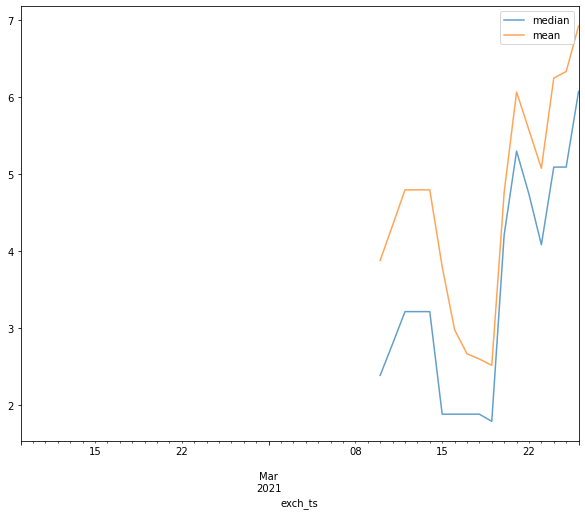

In [24]:
ax=DF({'median':dff.dropna().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)}).plot(alpha=0.7)
ax=DF({'mean':dff.dropna().resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)}).plot(ax=ax,alpha=0.7)
#DF(dff.resample('1D').sum().asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7,ax=ax)

# vectorbt

In [8]:
def vbtstrat(df0,df1,lag=20,nstdl=2,nstdh=2,methodma='ma',methodstd='ma',verbose=0,plot=False):
    spread_bps = (df0.c-df1.c)/df1.c
    bb=DF({'spread':spread_bps}).addbb(lags=lag,methodma=methodma,methodstd=methodstd,nstdh=nstdh,nstdl=nstdl,dropna=False)
    bb.iplot()
    entries_dirty = bb['spread'] < bb['bbl.spread']
    exits_dirty = bb['spread'] > bb['bbh.spread']
    #entries[entries==True]
    entries,exits = pd.Series.vbt.signals.clean(entries_dirty,exits_dirty, entry_first=True, broadcast_kwargs=dict(columns_from='keep'))
    
    
    if plot:
        fig = vbt.make_subplots(specs=[[{"secondary_y": True}]])
        
        
#         fig = vbt.make_subplots(
#         rows=5, cols=1, shared_xaxes=True, 
#         row_heights=[*[0.5 / 3] * len(symbols), 0.25, 0.25], vertical_spacing=0.05,
#         subplot_titles=(*symbols, '%B', 'Bandwidth'))
        
        
        fig = spread_bps.vbt.plot(trace_kwargs=dict(name='df0.c'), fig=fig)
        #fig = df1['c'].vbt.plot(trace_kwargs=dict(name='df1.c'), fig=fig)
        fig = entries.vbt.signals.plot_as_entry_markers(spread_bps, fig=fig)
        fig = exits.vbt.signals.plot_as_exit_markers(spread_bps, fig=fig)
        fig.update_layout(template='vbt_dark', showlegend=False, width=1600, height=300)
        fig.show()
    
    # #ts exits
    # # Execute at the next bar
    # vbt_entries= pd.Series.vbt.signals.empty_like(dfbtc1['c'])
    # vbt_entries.loc[dfliq1[dfliq1['v'].shift(1)>liqlimit].index]=True
    # ts_exits = vbt.OHLCSTEX.run(vbt_entries,df0['o'],df0['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops),wait=1,stop_type=None, hit_price=None).exits
    # vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
    # portf = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
    #percentage order size
    symbol_cols = pd.Index([0, 1], name='symbol')
    ordersize = pd.DataFrame(index=entries.index, columns=symbol_cols)
    ordersize[0] = np.nan
    ordersize[1] = np.nan
    ordersize.loc[exits, 0] = -1
    ordersize.loc[entries, 0] = 1
    ordersize.loc[exits, 1] = 1
    ordersize.loc[entries, 1] = -1

    #shoft ordersize
    ordersize = ordersize.vbt.fshift(1)

    portf=vbt.Portfolio.from_orders(
            close=pd.concat((df0['c'], df1['c']), axis=1, keys=symbol_cols),  # current close as reference price
            size=ordersize,  
            price=pd.concat((df0['o'], df1['o']), axis=1, keys=symbol_cols),  # current open as execution price
            size_type='targetpercent', 
            val_price=pd.concat((df0['c'], df1['c']), axis=1, keys=symbol_cols),#.vbt.fshift(1),  # previous close as group valuation price
            init_cash=10000,
            fees=0.0006,
            cash_sharing=True,  # share capital between assets in the same group
            group_by=True,  # all columns belong to the same group
            call_seq='auto',  # sell before buying
            freq='d'  # index frequency for annualization
        )

    if verbose:
        entries.astype('float').plot()
        exits.astype('float').plot()
        ordersize.dropna().plot(marker='x')
        portf.orders.records_readable
        portf.trades.records_readable
        portf.stats()
        
        
    for nstdl in np.linspace(1,2.2,20):
    for nstdh in np.linspace(1,2.2,20):
        vbstratres=vbtstrat(df0,df1,lag=100,nstdl=nstdl,nstdh=nstdh)
        dff[nstdl,nstdh]=vbstratres['portf'].returns()
        resSRtotal.append({'nstdl':nstdl,'nstdh':nstdh,'SR':vbstratres['portf'].sharpe_ratio()})
        resNTtotal.append({'nstdl':nstdl,'nstdh':nstdh,'NT':(vbstratres['entries'].astype(float).sum()+vbstratres['exits'].astype(float).sum())/((dff.index[-1]-dff.index[0])/pd.Timedelta('4.33w'))
    })    
        
        
        
    return {'portf':portf,'entries':entries,'exits':exits,'entries_dirty':entries_dirty,'exits_dirty':exits_dirty,'SR':portf.sharpe_ratio(),'ind':bb}
#vbtstrat(df0,df1,spreadL=-600,spreadH=-100,verbose=0)

IndentationError: expected an indented block (<ipython-input-8-3d5e1066fc7c>, line 72)

In [ ]:
dff=pd.DataFrame(columns=pd.MultiIndex.from_tuples([(np.nan,np.nan)],names=['nstdl','nstdh']),index=df0['c'].index)
dff.head(2)

resSRtotal=[]
resNTtotal=[]

for nstdl in np.linspace(1,2.2,20):
    for nstdh in np.linspace(1,2.2,20):
        vbstratres=vbtstrat(df0,df1,lag=100,nstdl=nstdl,nstdh=nstdh)
        dff[nstdl,nstdh]=vbstratres['portf'].returns()
        resSRtotal.append({'nstdl':nstdl,'nstdh':nstdh,'SR':vbstratres['portf'].sharpe_ratio()})
        resNTtotal.append({'nstdl':nstdl,'nstdh':nstdh,'NT':(vbstratres['entries'].astype(float).sum()+vbstratres['exits'].astype(float).sum())/((dff.index[-1]-dff.index[0])/pd.Timedelta('4.33w'))
})
        

dff.drop(np.nan, axis=1, level=1,inplace=True)
dff.head()        
#dff.plot()
DF(resSRtotal).pivot('nstdl','nstdh').vbt.heatmap()

DF(resNTtotal).pivot('nstdl','nstdh').vbt.heatmap()# if very few trades, do not consider these params, exclude them form PBO calculation


DF(resSRtotal).pivot('nstdl','nstdh')

#Entirely possible that all the N strategy configs have high but similar Sharpe ratios. Therefore, PBO may appear high, however, 'overfitting' here is among many 'skilful' strategies.

pypbo.pbo(dff, S=8, metric_func=lambda x: perf.sharpe_iid(x), threshold=1, n_jobs=4,plot=True, verbose=False, hist=False)

# best strategy viz

In [ ]:
#res=vbtstrat(df0,df1,nstdl=1.4,nstdh=1.8,lag=100,plot=True)
res=vbtstrat(df0,df1,nstdl=1.8,nstdh=1.3,lag=20,plot=True,methodma='ma',methodstd='ma',verbose=1)
print('SR',res['SR'])
res['portf'].stats()

ax=DF({'median':dff.resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)}).plot(alpha=0.7)
ax=DF({'mean':dff.resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)}).plot(ax=ax,alpha=0.7)
DF(res['portf'].returns().resample('1D').sum().asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7,ax=ax)
res['ind'].plot()



# bt vs vectorbt

## equity curve

In [ ]:
res['portf'].value().vbt.plot(width=1200)
cerebro.plot(iplot=False)

## returns

In [ ]:
#daily returns

rets=DF(res['portf'].returns().resample('1D').sum().asfreq('1D'),columns=['vbt']).join(pd.DataFrame.from_dict(dict(btres.analyzers.timereturn.get_analysis()),orient='index', columns=['bt']))
rets.expanding().sum().iplot()

## indicators

In [ ]:
res['ind'].join(getinds(cerebro)[0]).iplot()

## signals

In [ ]:
#check indocator bt vs vbt

(DF({'entry_dirty':res['entries_dirty'],'entry_clean':res['entries']}).astype(float)/100).join(getinds(cerebro)[0],rsuffix='bt').iplot()

## orders

In [ ]:
# vectorbt
res['portf'].orders.records_readable


In [ ]:
# bt


## trades

In [ ]:
#bt 
#DF(btres.analyzers.tradelist.get_analysis()).set_index('datein')
#vectorbt
res['portf'].trades.records_readable.set_index('Entry Date').query('Column==0').add_suffix('vbt').head(1)
res['portf'].trades.records_readable.set_index('Entry Date').query('Column==1').add_suffix('vbt').head(1)
DF(btres.analyzers.tradelist.get_analysis()).set_index('datein').head(2)

In [ ]:
# vectorbt replication using backtrader entries exits



bt_entries_mask = btt[btt.amount > 0]
bt_entries_mask.index = bt_entries_mask.index
bt_exits_mask = btt[btt.amount < 0]
bt_exits_mask.index = bt_exits_mask.index
bt_entries = pd.Series.vbt.signals.empty_like(df0['c'])
bt_entries.loc[bt_entries_mask.index] = True
bt_exits = pd.Series.vbt.signals.empty_like(df0['c'])
bt_exits.loc[bt_exits_mask.index] = True
btp = vbt.Portfolio.from_signals(df0['o'], bt_entries, bt_exits, price=df0['o'])#.vbt.fshift(1))
# display trades and cashflow
btp.get_trades().records_readable
btp.get_orders().records_readable
btp.share_flow().replace(0,np.nan).dropna()
btp.cash_flow().replace(0,np.nan).dropna()
btp.stats()
#viz
fig = vbt.make_subplots(specs=[[{"secondary_y": True}]])
fig = dfbtc1['c'].vbt.plot(trace_kwargs=dict(name='Price'), fig=fig)
fig = bt_entries.vbt.signals.plot_as_entry_markers(dfbtc1['c'], fig=fig)
fig = bt_exits.vbt.signals.plot_as_exit_markers(dfbtc1['c'], fig=fig)
fig.show_svg()

# vectorbt replication bt strategy  entries, exits calculated by vectorbt


step = 0.01  # 1%
stops =npa([bt_trailpercent])
vbt_entries= pd.Series.vbt.signals.empty_like(dfbtc1['c'])
vbt_entries.loc[dfliq1[dfliq1['v'].shift(1)>liqlimit].index]=True
ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'], dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops),wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
portf = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
portf.stats()

# visualizaitons
vbt_entries.astype(int).plot()
bt_entries.astype(int).plot()
fig = vbt.make_subplots(specs=[[{"secondary_y": True}]])
fig = dfbtc1['o'].vbt.plot(trace_kwargs=dict(name='Price'), fig=fig)
fig = vbt_entries.vbt.signals.plot_as_entry_markers(dfbtc1['o'], fig=fig)
fig = vbt_exits.vbt.signals.plot_as_exit_markers(dfbtc1['o'], fig=fig)
fig.show_svg()

portf.get_trades().records_readable
portf.get_orders().records_readable
portf.share_flow().replace(0,np.nan).dropna()
portf.cash_flow().replace(0,np.nan).dropna()

# vectorization 1d ts stops

In [ ]:
dff.columns = [f"{x}_{y}" for x, y in dff.columns.to_flat_index()]
dff

In [ ]:
dff[dff.columns[50:55]].plot()

In [ ]:

portf.final_value().plot()
plt.show()
portf.sharpe_ratio().plot(title='sharpe')

# vectorization 2d limit

In [ ]:
step = 0.005  
stops =list(np.arange(step, 0.20, step))
liqstep=200.
liqlimits=np.arange(liqstep, 2000, liqstep)


vbt_entries= pd.Series.vbt.signals.empty_like(DF(index=dfbtc1['c'].index,columns=np.arange(len(liqlimits))))

#strategy
dfentr=DF(dfliq1[['v']].shift(1).values>liqlimits,index=dfliq1['v'].index)
vbt_entries.update(dfentr)
vbt_entries.fillna(False,inplace=True)



ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(stops), wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
portf = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
#end strategy

In [ ]:
#viz
#median, mean   strat  rolling sharpe
ax=DF(portf.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7)
DF(portf.returns().resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#total heatmaps
portf.final_value().subtract(10000).unstack().plot()
portf.final_value().subtract(10000).unstack().vbt.heatmap()#xaxis={"title": 'Traits',"tickangle": 45}
portf.sharpe_ratio().unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)
portf.final_value().subtract(10000).unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)

In [ ]:
#best params
#ighest sharpe of rolling sharpe ratios  
portf.returns().resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).vbt.returns.sharpe_ratio().argmax()
#portf.returns().T.index[portf.returns().resample('1D').sum().vbt.returns.sharpe_ratio().argmax()]
#highest minimal rolling sharpe
portf.returns().resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).min().argmax()

In [ ]:
#portf.returns().resample('1D').sum().median(axis=1)
portf.returns()[0.1][1].resample('1D').sum().vbt.returns().sharpe_ratio()
portf.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().sharpe_ratio()
portf.returns()[0.005][0].resample('1D').sum().vbt.returns().sharpe_ratio()

In [ ]:
#DF(portf.returns()[0.1][1].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).join(dfbtc['c']).plot2(1,'c')
DF(portf.returns()[0.1][1].resample('1D').sum().vbt.returns().daily()).join(dfbtc['c']).plot2(1,'c')
DF(portf.returns()[0.1][1].resample('1D').sum().vbt.returns().cumulative()).join(dfbtc['c']).plot2(1,'c')

In [ ]:
ax=DF(portf.returns()[0.1][1].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot()
ax=DF(portf.returns()[0.005][0].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(portf.returns()[0.085][2].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(portf.returns()[0.13][2].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)
ax=DF(portf.returns()[0.065][0].resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#ax=DF(portf.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)



In [ ]:
df1.c.loc['2021-03-02'].resample('1H').last().ffill()

## attemps at geenralization for n params,   not efficient  entries contstruction. 

import itertools

def f(s):
    print()
    print(s.head())
    raise 1
    
entries.apply(f,entries)

liqstep=200
liqlimits=np.arange(liqstep, 2000, liqstep)

step = 0.005  
ts_stops =list(np.arange(step, 0.20, step))

params={
    'liqlimit':liqlimits
    #'ts_stop':ts_stops
}

#list(itertools.product(*params.values()))
entries=pd.DataFrame(False,columns=pd.MultiIndex.from_tuples(  list(itertools.product(*params.values())) ,names=list(params.keys()) ),index=dfbtc1['c'].index)
#entries=pd.DataFrame(columns=pd.MultiIndex.from_tuples([len(params)*(np.nan,)],names=list(params.keys()),index=dfbtc1['c'].index)
#entries=pd.DataFrame(columns=pd.MultiIndex.from_tuples([len(params)*(np.nan,)],names=['p'+str(i) for i in range(nparams)]),index=dfbtc1['c'].index)
entries.head()
# entry strategy
dfentr=DF((dfliq1[['v']].shift(1).values>params['liqlimit']),index=dfliq1['v'].index)
dfentr.astype(float).sum().sum()
entries.update(dfentr,errors='raise')                                                                                                     

entries.sum().sum()
entries.astype(float).plot()
# exit strategy
exits=vbt.OHLCSTEX.run(entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=ts_stops, wait=1,stop_type=None, hit_price=None).exits
exits.head()
entries,exits=pd.DataFrame.vbt.signals.clean(entries, exits)
entries.head()
# entry is on 'open'
portr=vbt.Portfolio.from_signals(dfbtc1['o'], entries, exits, price=dfbtc1['o']).returns()#.head()#.resample('1D').sum().vbt.returns().rolling_sharpe_ratio(30).head()

portr.head()

# for i in range(len(params)):
#     portr.columns=portr.columns.droplevel()

#portr.head()
# param fix plots    
    
fixparams={'liqlimit':200,'ohlcstex_ts_stop':0.005}

#dff=portr.loc[:,(portr.columns.get_level_values('param1')==5)&(portr.columns.get_level_values('param0')==1)]#.head().columns.droplevel('param0')
#dff.columns=dff.columns.droplevel(['param0','param1'],axis='columns')
#portr.loc[:,(portr.columns.get_level_values('param1')==5)&(portr.columns.get_level_values('param0')==1)].droplevel(['param0','param1'],axis='columns')#.vbt.returns.daily().vbt.returns.sharpe_ratio().unstack().vbt.heatmap()

#def rolling_daily_sharpe_ratio_plot(df,fixedparams,window=30):
def dffixparams(df,fixparams):
    cond=True
    for k,v in fixparams.items():
        print(f"{k,v}")
        cond=(df.columns.get_level_values(k)==v)&cond
    print(f"cond={cond}")
    return df.loc[:,cond]#.droplevel(list(fixparams.keys()),axis='columns')

dffixparams(portr,fixparams).vbt.returns.daily().vbt.returns.rolling_sharpe_ratio(100).plot()#.unstack().vbt.heatmap()
    


raise 1

#strategy
dfentr=DF((dfliq1[['v']].shift(1).values>liqlimits1)&(dfliq1[['v']].shift(1).values<liqlimits2),index=dfliq1['v'].index)
vbt_entries.update(dfentr)                                                                                                     
vbt_entries.fillna(False,inplace=True)


ts_exits = vbt.OHLCSTEX.run(vbt_entries,dfbtc1['o'],dfbtc1['h'],dfbtc1['l'],dfbtc1['c'],ts_stop=list(tsstops), wait=1,stop_type=None, hit_price=None).exits
vbt_entries, vbt_exits = pd.DataFrame.vbt.signals.clean(vbt_entries, ts_exits)
portf = vbt.Portfolio.from_signals(dfbtc1['o'], vbt_entries, ts_exits, price=dfbtc1['o'])#.vbt.fshift(1))
#end strategy


#viz
#median, mean   strat  rolling sharpe
ax=DF(portf.returns().resample('1D').sum().median(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(alpha=0.7)
DF(portf.returns().resample('1D').sum().mean(axis=1).asfreq('1D').vbt.returns().rolling_sharpe_ratio(30)).plot(ax=ax,alpha=0.7)

#heatmaps
portf.final_value().subtract(icap).unstack().plot()
portf.final_value().subtract(icap).unstack().vbt.heatmap()#xaxis={"title": 'Traits',"tickangle": 45}
portf.sharpe_ratio().unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)
portf.final_value().subtract(icap).unstack().rename(columns=dict(zip(np.arange(len(liqlimits)),list(liqlimits)))).vbt.heatmap(width=800,height=800,yaxis_nticks=40)